## Computer Lab 3: Transfer Learning with Autoencoders

### Computational Systems Biology (MedBioinfo)
###### Author: David Martínez Enguita (david.martinez@liu.se)


### Contents
1. Introduction to autoencoders
2. The ReLU function
3. Autoencoder training and evaluation
4. Transfer learning for supervised tasks
5. Interpreting neural networks

### 1. Introduction to autoencoders


Autoencoders (AEs) are deep learning neural network models designed for learning **latent representations** of data in an unsupervised manner.

They utilize an **encoder-decoder** architecture with the aim of reconstructing the input data at the output layer, while compressing the data by extracting meaningful features and discarding noisy or irrelevant information. That is why AEs can also be thought of as a sort of *"non-linear PCA"*.

The encoder component maps the input data to a latent space, from which the decoder component then retrieves back the original input with a certain accuracy. Exploring the latent space allows us to detect key patterns and structures within the data.

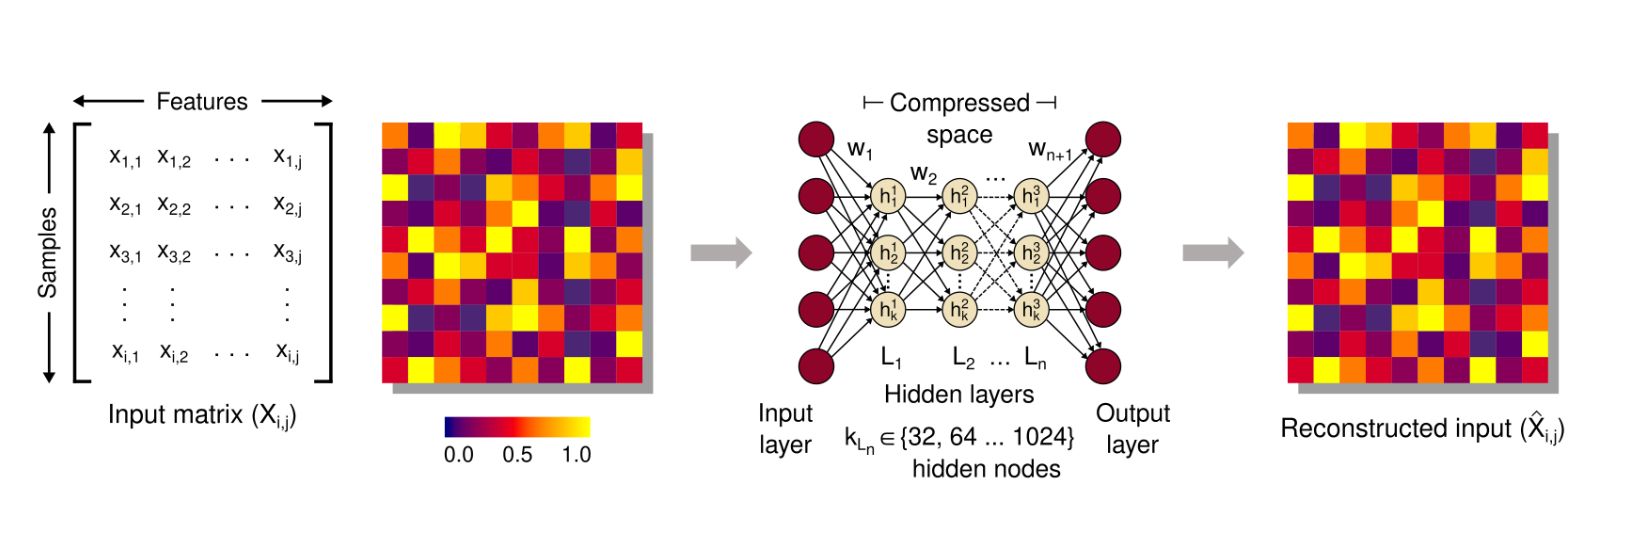

AEs are able to capture non-linear relationships and have proven effective in domains such as image and text processing, anomaly detection, and dimensionality reduction.

To design an AE model, we have to define its architecture, including the depth (number of layers in the encoder and decoder), their width (number of nodes), and the activation functions between them, among other hyperparameters. 

One of the most popular activation functions is the rectified linear unit (ReLU) function.

### 2. The ReLU function


### 2.1 Activation functions

The activation functions in neural networks transform the summed weighted input into an activation signal. 

Usually, neural networks leverage the properties of non-linear functions, since they can learn complex data mappings which linear functions fail to model. 

Examples of classical non-linear functions are the **sigmoid** (or logistic) and the **hyperbolic tangent** (tanh) activation functions.

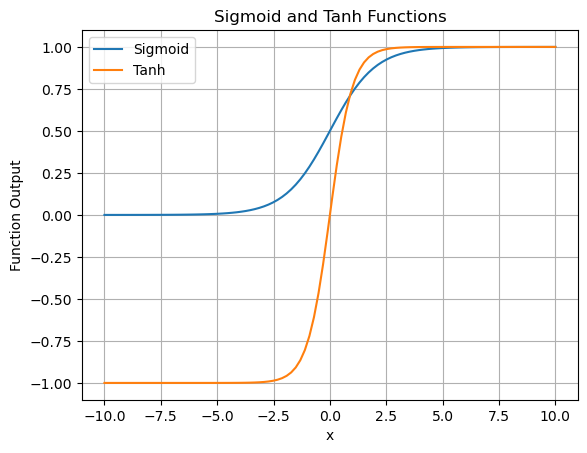

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

# Generate input values
x = np.linspace(-10, 10, 100)

# Compute sigmoid and tanh values for the input
sigmoid_y = sigmoid(x)
tanh_y = tanh(x)

# Plot the sigmoid and tanh functions
plt.plot(x, sigmoid_y, label='Sigmoid')
plt.plot(x, tanh_y, label='Tanh')
plt.xlabel('x')
plt.ylabel('Function Output')
plt.title('Sigmoid and Tanh Functions')
plt.legend()
plt.grid(True)
plt.show()

However, these functions have limited sensitivity (only around their middle points) and tend to saturate the inputs, decreasing the effectiveness of the learning algorithm.

They also suffer from the **vanishing gradient problem**. 

The gradients of an activation function represent the rate of change of the activation function with respect to its input. They indicate how sensitive the output is to changes in the input.

Neural network layers deeper in the model structure that use sigmoid or tanh functions do not receive useful gradient information and the amount of error to backpropagate (= update the parameters = learn) decreases with each layer, which could prevent effective learning.

Here we can see how does this phenomenon happen:

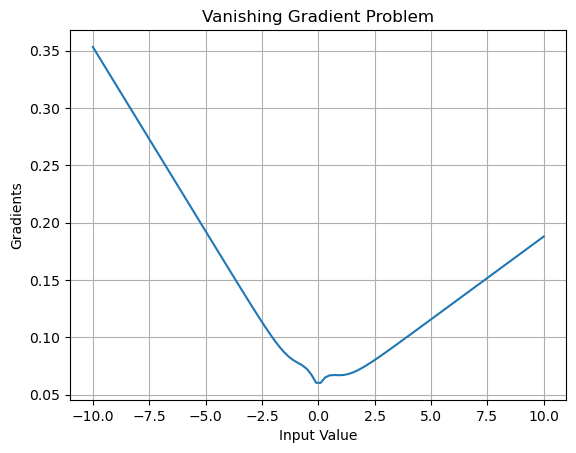

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def neural_network(x):
    w1 = np.array([[2.0, 0.0],
                   [0.0, 2.0]])
    w2 = np.array([[2.0],
                   [2.0]])
    b1 = np.array([[0.0],
                   [0.0]])
    b2 = np.array([[0.0]])

    # Forward pass
    a1 = np.dot(w1, x) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(w2.T, z1) + b2
    z2 = sigmoid(a2)

    # Backward pass
    dz2 = z2 - 0.5  # Assume a target value of 0.5
    da2 = dz2 * sigmoid(a2) * (1 - sigmoid(a2))
    dw2 = np.dot(z1, da2.T)
    db2 = np.sum(da2, axis=1, keepdims=True)
    dz1 = np.dot(w2, da2) * sigmoid(a1) * (1 - sigmoid(a1))
    da1 = dz1
    dw1 = np.dot(x, da1.T)
    db1 = np.sum(da1, axis=1, keepdims=True)

    return dw1, dw2

# Generate input values
x = np.linspace(-10, 10, 100)

# Calculate gradients for each input
gradients = []
for val in x:
    dw1, dw2 = neural_network(val)
    gradients.append(np.linalg.norm(dw1) + np.linalg.norm(dw2))

# Plot the gradients
plt.plot(x, gradients)
plt.xlabel('Input Value')
plt.ylabel('Gradients')
plt.title('Vanishing Gradient Problem')
plt.grid(True)
plt.show()

In the plot we can observe that **the gradients become very small or close to zero** for certain input values.

This indicates that the training of this neural network is already having difficulties in the first layers in learning and updating the weights due to the diminishing gradients.

We thus need other non-linear activation functions that can help deal with this problem.

### 2.2 ReLU

The **Rectified Linear Unit (ReLU)** function is a non-linear activation function that outputs the input (if positive) or zero (if negative).

ReLU is a hinge or piecewise linear function, since it is formed by two linear functions that operate in the respective parts of its domain: (-Inf, 0] and [0, Inf). However, it is not linear if we consider its entire domain.

This preserves some advantageous linear model properties, like the easy optimization with gradient-based methods and the efficient generalization.

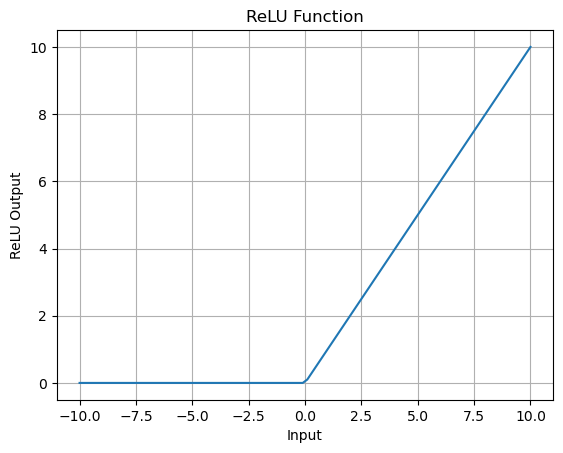

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

# Generate input values
x = np.linspace(-10, 10, 100)

# Apply ReLU function to the input
y = relu(x)

# Plot the ReLU function
plt.plot(x, y)
plt.xlabel('Input')
plt.ylabel('ReLU Output')
plt.title('ReLU Function')
plt.grid(True)
plt.show()


Furthermore, ReLU overcomes the vanishing gradients problem and allows faster learning and better performance. 

However, it also introduces some limitations of its own, such as the "dying ReLU" problem (constant zero gradients that do not update), for which variations of ReLU have been developed (e.g. leaky ReLU, that allows small negative outputs).

ReLU is the default activation function used to train Multilayer Perceptrons (MLPs), Convolutional Neural Networks (CNNs), Autoencoders (AEs), Transformers, and multiple other NN architectures.

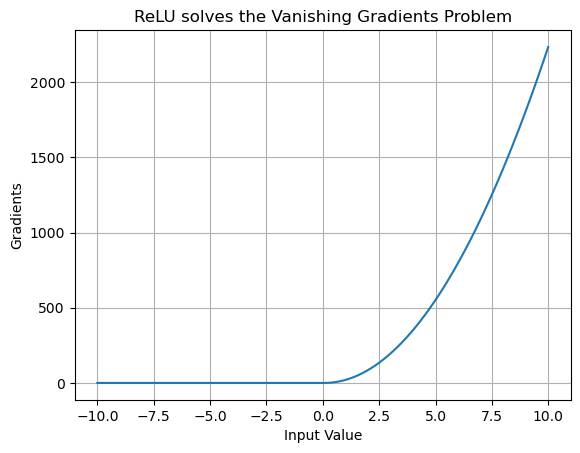

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

def neural_network(x):
    w1 = np.array([[2.0, 0.0],
                   [0.0, 2.0]])
    w2 = np.array([[2.0],
                   [2.0]])
    b1 = np.array([[0.0],
                   [0.0]])
    b2 = np.array([[0.0]])

    # Forward pass
    a1 = np.dot(w1, x) + b1
    z1 = relu(a1)
    a2 = np.dot(w2.T, z1) + b2
    z2 = relu(a2)

    # Backward pass
    dz2 = z2 - 0.5  # Assume a target value of 0.5
    da2 = dz2 * (a2 > 0).astype(float)  # ReLU derivative: 1 for positive inputs, 0 otherwise
    dw2 = np.dot(z1, da2.T)
    db2 = np.sum(da2, axis=1, keepdims=True)
    dz1 = np.dot(w2, da2) * (a1 > 0).astype(float)  # ReLU derivative
    da1 = dz1
    dw1 = np.dot(x, da1.T)
    db1 = np.sum(da1, axis=1, keepdims=True)

    return dw1, dw2

# Generate input values
x = np.linspace(-10, 10, 100)

# Calculate gradients for each input
gradients = []
for val in x:
    dw1, dw2 = neural_network(val)
    gradients.append(np.linalg.norm(dw1) + np.linalg.norm(dw2))

# Plot the gradients
plt.plot(x, gradients)
plt.xlabel('Input Value')
plt.ylabel('Gradients')
plt.title('ReLU solves the Vanishing Gradients Problem')
plt.grid(True)
plt.show()


### 3. Autoencoder training and evaluation


### 3.1 Preparing the training data

Autoencoders are well-suited for training on unlabeled data, specially in scenarios where the input data has inherent patterns or structures that can be captured in a lower-dimensional representation.

In this case, we will train our autoencoder using **DNA methylation data** in the form of **beta values** (0 to 1, where 0 represents no CpG methylation and 1 represents complete CpG methylation). 

For simplicity, our training data (n = 1,514 samples) will contain only 2,000 features (CpG sites), corresponding to a mixture of random and high-variance features from three publicly available case-control studies (GSE116339, GSE131433, and GSE142512).

We can first load the full beta value matrix:

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load AE input set
ae_input = pd.read_csv("AE_input.csv", header=0, index_col=0)
ae_input = np.transpose(ae_input)

# Look at the first 10 samples and features
ae_input.iloc[0:10, 0:10]

,cg23361659,cg26370062,cg18235835,cg00333679,cg02972941,cg06417478,cg22097505,cg01667892,cg12717729,cg18477163
GSM4230843,0.960,0.925,0.997,0.220,0.956,0.412,0.999,0.728,0.082,0.647
GSM3780319,0.904,0.901,0.890,0.265,0.955,0.401,0.972,0.882,0.085,0.630
GSM4230733,0.939,0.938,0.990,0.215,0.975,0.328,0.999,0.706,0.084,0.715
GSM4230878,0.927,0.922,0.971,0.232,0.950,0.610,0.999,0.647,0.078,0.598
GSM3780441,0.967,0.937,0.999,0.240,0.930,0.421,0.979,0.760,0.124,0.669
GSM4230840,0.966,0.929,0.999,0.210,0.967,0.403,0.999,0.863,0.035,0.765
GSM4231069,0.695,0.840,0.731,0.383,0.817,0.213,0.526,0.645,0.449,0.393
GSM4230887,0.983,0.937,0.998,0.202,0.961,0.001,0.999,0.827,0.046,0.810
GSM4230827,0.970,0.937,0.999,0.187,0.977,0.416,0.999,0.836,0.017,0.793
GSM3780188,0.816,0.842,0.910,0.211,0.901,0.001,0.968,0.823,0.099,0.592


Then, we will split the data into three different sets: 
    
   - **Training set**: main set used for model parameter estimation and weight updates during the learning process.
   
      
   - **Validation set**: secondary set used to fine-tune the model's hyperparameters and assess its performance during training. It helps in detecting overfitting or underfitting by providing an unbiased measure of the model's generalization ability.
   
   
   - **Test set**: held-out set used to evaluate the performance of a model after training and estimate its generalization ability on unseen data.
   
For the training to be performed correctly, the three sets should be balanced and representative of the underlying data distribution, and the test set should not be seen by the model until after the training is completed. Else, the model's performance assessment will be unreliable or biased. 
    
We will use a 80:20 ratio to split the data into training and test sets, and the same 80:20 ratio to split again the training set into training and validation sets.

In [7]:
# Split the data into train, validation, and test sets
X_train, X_test = train_test_split(ae_input, test_size=0.2, 
                                   random_state=777)
X_train, X_val = train_test_split(X_train, test_size=0.2, 
                                  random_state=777)

# Print the shape of each set
print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Train set shape: (968, 2000)
Validation set shape: (243, 2000)
Test set shape: (303, 2000)


### 3.2 Compiling the autoencoder

We will define the autoencoder architecture in a **sequential** manner, for the encoder and decoder layers in order. 

For each dense layer, we can specify the number of hidden nodes and the activation function. 

The output layer will use the sigmoid function since it suits the range of our data.

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models, utils

# Define the dimensions of the input data (2,000 features in our case)
input_dim = 2000

# Define the encoder architecture
encoder = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu')
])

# Define the decoder architecture
decoder = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(64,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(input_dim, activation='sigmoid')
])

# Create the autoencoder by combining the encoder and decoder
autoencoder = models.Sequential([encoder, decoder])

/mnt/data/hong/anaconda3/envs/grn_lab/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model compilation checks for format errors and defines the loss function, the optimizer or learning rate, and the metrics. 

A compiled model is needed for training but it is not necessary for predicting.

We will use the **mean squared error (MSE)** as our loss function. During training, the model will attempt to minimize the MSE loss by adjusting the parameters, which will drive the model to produce predictions that closely match the true values.

In [11]:
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Print the summary of the autoencoder architecture
autoencoder.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ ?                      │       553,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ ?                      │       555,344 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,108,752 (4.23 MB)

 Trainable params: 1,108,752 (4.23 MB)

 Non-trainable params: 0 (0.00 B)

We can also look at the layers of the encoder and decoder separately.

In [14]:
# Visualize the autoencoder architecture
utils.plot_model(encoder, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [15]:
utils.plot_model(decoder, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


**Optimizers** determine the direction and magnitude of the parameter updates during the NN training, in order to help the model converge towards an optimal solution.

In particular, **Adam** (short for Adaptive Moment Estimation) is an optimization algorithm commonly used in deep learning which combines the concepts of momentum and adaptive learning rates to efficiently update model parameters.

It maintains a running average of both the gradients and squared gradients of the parameters, adapting the learning rate for each parameter based on the first and second moments of the gradients. This allows handling sparse gradients and speeds up convergence.

Instead of using the default values, we can also fine-tune Adam parameters to (hopefully) improve the training process.

In [48]:
from keras import optimizers

our_optimizer = optimizers.Adam(learning_rate=1e-5, 
                                beta_1=0.9, 
                                beta_2=0.999,
                                epsilon=1e-8,
                                decay=1e-6)
                           
# Compile the autoencoder
autoencoder.compile(optimizer=our_optimizer, loss='mean_squared_error')

# Information about Adam optimizer parameters: https://keras.io/api/optimizers/adam/

/mnt/data/hong/anaconda3/envs/grn_lab/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Out of these parameters, the **learning rate (lr)** is probably the most critical one, as it influences the speed and quality of the model's convergence during training. 

Too high learning rates may cause the parameter updates to be large, which may lead to the model overshooting the optimal solution. 

On the other hand, if the learning rate is too low, the model may converge very slowly, requiring more training iterations to reach an acceptable solution.

Selecting an optimal learning rate often involves experimentation and tuning, considering factors such as the dataset complexity, model architecture, and specific learning task.

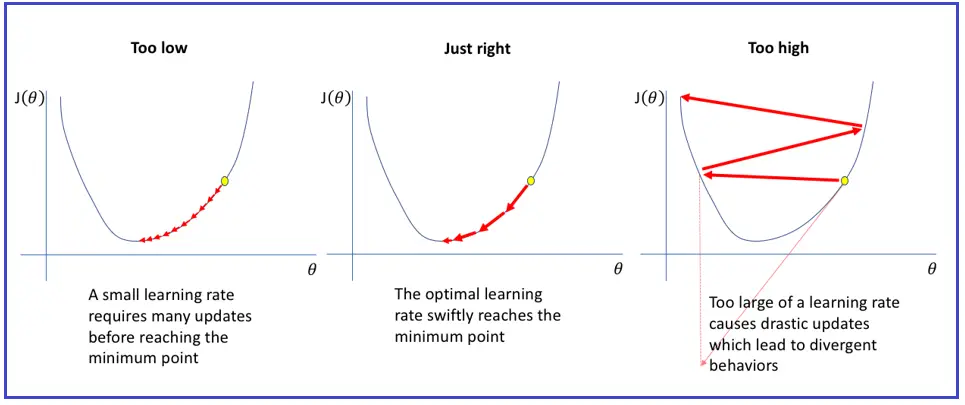

### 3.3 Regularizer layers

#### 3.3.1 Batch Normalization layer:
Batch normalization is a technique used in NNs to normalize the activations of a previous layer. It helps to address training issues such as internal covariate shift (changes in the distribution of inputs to each layer of the network during training).

The batch normalization layer **normalizes the mean and variance of the inputs** by computing their batch-wise statistics. 

The normalization step helps in stabilizing the training process, making the network less sensitive to the choice of learning rate, and accelerating the convergence of the network.

#### 3.3.2 Dropout layer:
Dropout is a regularization technique used in NNs to prevent overfitting. During training, dropout **randomly sets a fraction of the input units to 0** at each update, which effectively drops them out of the network for that particular forward and backward pass.

By randomly dropping out units, dropout encourages the network to learn more robust and generalizable features, forcing the model to distribute information across a wider set of features.

Dropout is typically applied after dense (fully connected) layers in a neural network, but it can also be used with other types of layers, such as convolutional layers. 

The **dropout rate**, which determines the probability of dropping out a unit, is a hyperparameter that needs to be tuned based on the specific problem and dataset.

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models, utils

# Define the dimensions of the input data
input_dim = 2000

# Define the encoder architecture
encoder = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(input_dim,)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization()
])

# Define the decoder architecture
decoder = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(64,)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(input_dim, activation='sigmoid')
])

# Create the autoencoder by combining the encoder and decoder
autoencoder = models.Sequential([encoder, decoder])

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Print the summary of the autoencoder architecture
# encoder.summary()
# decoder.summary()

In [22]:
# Visualize the encoder architecture
import pydot
import importlib
importlib.reload(pydot)
utils.plot_model(encoder, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [23]:
# Visualize the decoder architecture
utils.plot_model(decoder, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


### 3.4 Training the autoencoder

#### 3.4.1 Setting the callbacks
Callbacks are framework functions that add functionalities during the training process of a model.

We will use **Model Checkpoints** to automatically store the model's state at each epoch. Here, we will only save the best-performing model based on the validation metric.

Plus, we will use **Early Stopping** to halt the training if the validation metric does not improve for a certain number of epochs (patience), preventing overfitting.

In [27]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Set model callbacks
callback_list = []

best_checkpoint = ModelCheckpoint("my_autoencoder.keras", 
                                  monitor="val_loss",
                                  save_best_only=True, 
                                  save_weights_only=False,
                                  save_freq="epoch", 
                                  mode="min", 
                                  verbose=1)
callback_list.append(best_checkpoint)

early_stop = EarlyStopping(monitor="val_loss", 
                           mode="min",                           
                           patience=10,
                           verbose=1,)
callback_list.append(early_stop)

Now we can start the autoencoder training process. 

As you can see, we provide the training and validation sets twice, since the aim of the autoencoder is to reconstruct the input in its output.

You can modify the number of **training epochs** (passes of the entire training set through the model) and the **batch size** (divisions of the training set into smaller subsets for each parameter update).

Larger batch sizes require more memory, but also increase the training speed. Moreover, they reduce the noise and variance when estimating gradients, which in turn may decrease how well the model generalizes (less stochastic training).

In [28]:
# Train the autoencoder
autoencoder.fit(X_train, X_train, 
                epochs=100, 
                shuffle=True,
                batch_size=128, 
                validation_data=(X_val, X_val),
                callbacks=callback_list,
                verbose=1)

Epoch 1/100
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1253
Epoch 1: val_loss improved from inf to 0.10754, saving model to my_autoencoder.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.1251 - val_loss: 0.1075
Epoch 2/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1190 
Epoch 2: val_loss did not improve from 0.10754
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1188 - val_loss: 0.1108
Epoch 3/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1127 
Epoch 3: val_loss did not improve from 0.10754
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1123 - val_loss: 0.1115
Epoch 4/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1053 
Epoch 4: val_loss improved from 0.10754 to 0.10467, saving model to my_autoencoder.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1049 - val_loss: 0.1047
Epoch 5/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0999 
Epoch 5: val_loss improved from 0.10467 to 0.08688, saving model to my_autoencoder.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17

In [29]:
# Store final model manually
save_model = ("./my_autoencoder.h5")
autoencoder.save(save_model)

### 3.5 Evaluating the autoencoder

In [30]:
from sklearn.metrics import r2_score

# Predict test set
Xpred_test = autoencoder.predict(X_test)

# Calculate R-squared per feature
r2_values = []
for i in range(input_dim):
    r2 = r2_score(X_test.iloc[:,i], Xpred_test[:,i])
    r2_values.append(r2)

# Calculate median r-squared
median_r2 = np.median(r2_values)

print("Median R-squared value across all features:", median_r2)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Median R-squared value across all features: 0.20258887071414855


### Checkpoint 1

Design and optimize an autoencoder model for the training data provided. You can modify the model architecture, hyperparameters, activation function, optimizer, etc.

Try to obtain the highest reconstruction performance possible, measured as feature-wise median R-squared on the test set.

In [60]:
# Define the dimensions of the input data
input_dim = 2000

# Define the encoder architecture
encoder = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(input_dim,)),
    layers.BatchNormalization(),
    # layers.Dropout(0.1),
    layers.Dense(128, activation='softmax'),
    layers.BatchNormalization(),
    # layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization()
])

# Define the decoder architecture
decoder = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(64,)),
    layers.BatchNormalization(),
    # layers.Dropout(0.1),
    layers.Dense(256, activation='softmax'),
    layers.BatchNormalization(),
    # layers.Dropout(0.1),
    layers.Dense(input_dim, activation='sigmoid')
])

# Create the autoencoder by combining the encoder and decoder
autoencoder = models.Sequential([encoder, decoder])

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

/mnt/data/hong/anaconda3/envs/grn_lab/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Set model callbacks
callback_list = []

best_checkpoint = ModelCheckpoint("my_autoencoder_softmax_nodropout_nonorm.keras", 
                                  monitor="val_loss",
                                  save_best_only=True, 
                                  save_weights_only=False,
                                  save_freq="epoch", 
                                  mode="min", 
                                  verbose=1)
callback_list.append(best_checkpoint)

early_stop = EarlyStopping(monitor="val_loss", 
                           mode="min",                           
                           patience=100,
                           verbose=1,)
callback_list.append(early_stop)

# Train the autoencoder
autoencoder.fit(X_train, X_train, 
                epochs=500, 
                shuffle=True,
                batch_size=128, 
                validation_data=(X_val, X_val),
                callbacks=callback_list,
                verbose=1)

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0041 


Epoch 1: val_loss improved from inf to 0.00875, saving model to my_autoencoder_softmax_nodropout_nonorm.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0041 - val_loss: 0.0087
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040 
Epoch 2: val_loss did not improve from 0.00875
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0040 - val_loss: 0.0098
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0041 
Epoch 3: val_loss did not improve from 0.00875
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0041 - val_loss: 0.0088
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0041 
Epoch 4: val_loss improved from 0.00875 to 0.00821, saving model to my_autoencoder_softmax_nodropout_nonorm.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0041 - val_loss: 0.0082
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0041 
Epoch 5: val_loss did not improve from 0.00821
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0041 - val_loss: 0.0096
Epoch 6/500
8/

In [66]:
save_model = ("./my_autoencoder_softmax_nodropout_paient100.h5")
autoencoder.save(save_model)

In [67]:
from sklearn.metrics import r2_score

# Predict test set
Xpred_test = autoencoder.predict(X_test)

# Calculate R-squared per feature
r2_values = []
for i in range(input_dim):
    r2 = r2_score(X_test.iloc[:,i], Xpred_test[:,i])
    r2_values.append(r2)

# Calculate median r-squared
median_r2 = np.median(r2_values)

print("Median R-squared value across all features:", median_r2)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Median R-squared value across all features: 0.38908223624906424


### 4. Transfer learning for supervised tasks


Once you have trained and optimized your autoencoder, we will learn how to apply a transfer learning approach to make use of the internal representation of the model.

**Transfer learning** is an ML technique that involves using the knowledge gained from training a model on a specific task to improve the performance of a different but related task. Instead of training a model from scratch, we re-use a pre-trained model as a starting point for the new task.

For this purpose, we will use the autoencoder **embeddings** of a new DNAm data set.

Embedding refers to the representation of our samples in a lower-dimensional space, which ideally should capture important characteristics or relationships.

First, we will extract the embeddings of our new data set by running it through the autoencoder, *until a certain layer.*

### 4.1 Assembling a pseudo-autoencoder

In [68]:
from tensorflow.keras.models import load_model

# Load model
autoencoder = load_model("my_autoencoder_softmax_nodropout_paient100.h5", compile=False)

In [69]:
# We need the name of the layers to build a new autoencoder without output layer
encoder.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_59 (Dense)                │ (None, 256)            │       512,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 555,200 (2.12 MB)

 Trainable params: 554,304 (2.11 MB)

 Non-trainable params: 896 (3.50 KB)

In [70]:
decoder.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_62 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 2000)           │       514,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 556,880 (2.12 MB)

 Trainable params: 556,112 (2.12 MB)

 Non-trainable params: 768 (3.00 KB)

**(!)**  You will need to modify the following code in order to adapt it to your own autoencoder architecture!

In [73]:
# We store the names of the layers of the encoder and decoder, in order
# We will omit the output layer - the data will not be converted back to CpGs
name_hl1 = "dense_59"
name_hl2 = "batch_normalization_39"
name_hl3 = "dense_60"
# name_hl4 = "batch_normalization_40"
# name_hl5 = "dense_61"
# name_hl6 = "batch_normalization_41" 
# name_hl7 = "dense_62" 
# name_hl8 = "batch_normalization_42" 
# name_hl9 = "dense_63" 
# name_hl10 = " batch_normalization_43" 
# name_hl11 = "dense_64"

In [78]:
from keras.models import Model, Sequential
from keras.layers import Input

# Assemble a new "pseudo-autoencoder" layer by layer to obtain the data embeddings
# The layers keep the weights from our pre-trained autoencoder
autoencoder_transfer = Sequential()
autoencoder_transfer.add(Input(shape=(input_dim, )))
autoencoder_transfer.add(encoder.get_layer(name_hl1))
autoencoder_transfer.add(encoder.get_layer(name_hl2))
autoencoder_transfer.add(encoder.get_layer(name_hl3))
# autoencoder_transfer.add(decoder.get_layer(name_hl4))
# autoencoder_transfer.add(decoder.get_layer(name_hl5))
# autoencoder_transfer.add(decoder.get_layer(name_hl6))
# autoencoder_transfer.add(decoder.get_layer(name_hl7))
# autoencoder_transfer.add(decoder.get_layer(name_hl8))
# autoencoder_transfer.add(decoder.get_layer(name_hl9))
# autoencoder_transfer.add(decoder.get_layer(name_hl10))

autoencoder_transfer.summary()

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_59 (Dense)                │ (None, 256)            │       512,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 128)            │        32,896 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 546,176 (2.08 MB)

 Trainable params: 545,664 (2.08 MB)

 Non-trainable params: 512 (2.00 KB)

### 4.2 Loading the labeled data

You can load and look at the new training set, which corresponds to a Parkinson's disease study (GSE111629, n = 571). 

It is already formatted as expected by your autoencoder, with the same 2,000 features in the same order.

In this case, we will be working on a case-control **binary classification task**. 

The goal is to achieve the maximum accuracy possible on the test set by designing a supervised deep neural network (DNN) that discriminates between patients and controls.

The supervised DNN will use the **embeddings as inputs**, instead of the original features.

In [79]:
# Load AE input set
AE_to_embed = pd.read_csv("supdnn_input.csv", header=0, index_col=0)
AE_to_embed = np.transpose(AE_to_embed)

AE_to_embed.shape

(571, 2001)

In [80]:
# Look at the first 10 samples and features
AE_to_embed.iloc[0:10, 0:10]

,cg23361659,cg26370062,cg18235835,cg00333679,cg02972941,cg06417478,cg22097505,cg01667892,cg12717729,cg18477163
GSM3035401,0.378,0.903,0.925,0.270,0.947,0.703,0.994,0.817,0.106,0.765
GSM3035402,0.884,0.939,0.945,0.254,0.904,0.001,0.988,0.785,0.083,0.533
GSM3035403,0.908,0.925,0.953,0.262,0.935,0.499,0.947,0.753,0.124,0.619
GSM3035404,0.902,0.915,0.944,0.245,0.940,0.001,0.981,0.674,0.097,0.520
GSM3035405,0.905,0.918,0.922,0.265,0.938,0.384,0.985,0.852,0.534,0.309
GSM3035406,0.286,0.912,0.938,0.241,0.946,0.001,0.990,0.719,0.094,0.375
GSM3035407,0.860,0.914,0.959,0.261,0.938,0.409,0.995,0.669,0.124,0.321
GSM3035408,0.898,0.902,0.359,0.221,0.961,0.391,0.973,0.370,0.096,0.289
GSM3035409,0.897,0.944,0.934,0.256,0.946,0.001,0.968,0.664,0.091,0.644
GSM3035410,0.878,0.937,0.920,0.266,0.950,0.680,0.990,0.863,0.087,0.704


In [81]:
# Look at the binary variable for Parkinson's disease (1) and controls (0)
AE_to_embed.iloc[0:10, 2000]

GSM3035401    1.0
GSM3035402    0.0
GSM3035403    1.0
GSM3035404    0.0
GSM3035405    0.0
GSM3035406    0.0
GSM3035407    0.0
GSM3035408    0.0
GSM3035409    0.0
GSM3035410    0.0
Name: Disease, dtype: float64

In [82]:
# Separate binary variable from AE input
embeddings_target = AE_to_embed.iloc[:, input_dim:]
AE_to_embed2 = AE_to_embed.iloc[:, :input_dim]

# Obtain embeddings by sending data through the pseudo-autoencoder
embeddings = pd.DataFrame(autoencoder_transfer.predict(AE_to_embed2))

embeddings.iloc[0:10, 0:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,0,1,2,3,4,5,6,7,8,9
0,0.004595,0.006925,0.003886,0.008097,0.004696,0.010956,0.006225,0.008285,0.015341,0.005272
1,0.006179,0.001344,0.006234,0.009226,0.008982,0.011449,0.008273,0.005916,0.006936,0.004828
2,0.005700,0.001614,0.004130,0.004416,0.004242,0.005054,0.006951,0.007063,0.014828,0.005950
3,0.006771,0.003724,0.007754,0.004824,0.005512,0.009261,0.010132,0.008273,0.005612,0.007655
4,0.011602,0.006476,0.005618,0.010978,0.004703,0.015007,0.003949,0.013906,0.005125,0.006618
5,0.008756,0.002748,0.003380,0.008122,0.009406,0.012223,0.003514,0.035478,0.007797,0.002934
6,0.004992,0.004702,0.007323,0.004240,0.004134,0.005930,0.004451,0.006207,0.014227,0.008738
7,0.005946,0.003732,0.005410,0.012674,0.006232,0.003814,0.001327,0.005616,0.002596,0.005836
8,0.003714,0.007163,0.008350,0.002853,0.004881,0.008050,0.002890,0.005852,0.003004,0.004912
9,0.005838,0.005715,0.007933,0.005744,0.002942,0.007828,0.002742,0.009454,0.007352,0.004878


In [83]:
# Recover binary variable
embeddings.reset_index(drop=True, inplace=True)
embeddings_target.reset_index(drop=True, inplace=True)

embeddings_out = pd.concat([embeddings, embeddings_target], axis=1)

# Save embeddings
np.savetxt("my_embeddings.csv", embeddings_out, delimiter=",", fmt="%s", comments="")

In [84]:
# Make sure that we have the correct output (571 samples, 256 embeddings + 1 variable)
embeddings_out.shape

(571, 129)

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load CSV file
embeddings_in = pd.read_csv("my_embeddings.csv", header=None)

# Separate embeddings and target variable
supy = embeddings_in.iloc[:, 128:]
supX = embeddings_in.iloc[:, :128]

# Split the data into train and test sets while maintaining the same proportion of the target variable
supX_train, supX_test, supy_train, supy_test = train_test_split(supX, supy, 
                                                                test_size=0.2, 
                                                                stratify=supy, 
                                                                random_state=777)

# Further split the training data into train and validation sets
supX_train, supX_val, supy_train, supy_val = train_test_split(supX_train, supy_train, 
                                                              test_size=0.2, 
                                                              stratify=supy_train, 
                                                              random_state=777)

# Print the shape of each set
print("Train set shape:", supX_train.shape)
print("Validation set shape:", supX_val.shape)
print("Test set shape:", supX_test.shape)

Train set shape: (364, 128)
Validation set shape: (92, 128)
Test set shape: (115, 128)


### 4.3 Designing and training the supervised DNN

In [101]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the dimensions of the input data
input_dim2 = 128

# Define the architecture of the neural network
supmodel = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim2,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
supmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the summary of the model architecture
supmodel.summary()

/mnt/data/hong/anaconda3/envs/grn_lab/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,369 (40.50 KB)

 Trainable params: 10,369 (40.50 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
# Train supervised neural network model
supmodel.fit(supX_train, supy_train,
             validation_data=(supX_val, supy_val),
             epochs=1000,
             batch_size=100,
             shuffle=True,
             verbose=1)

Epoch 1/1000


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5082 - loss: 0.6929 - val_accuracy: 0.5870 - val_loss: 0.6906
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5877 - loss: 0.6900 - val_accuracy: 0.5870 - val_loss: 0.6881
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5831 - loss: 0.6877 - val_accuracy: 0.5870 - val_loss: 0.6854
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5761 - loss: 0.6859 - val_accuracy: 0.5870 - val_loss: 0.6829
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5907 - loss: 0.6817 - val_accuracy: 0.5870 - val_loss: 0.6807
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5974 - loss: 0.6781 - val_accuracy: 0.5870 - val_loss: 0.6791
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5941 - loss: 0.6769 - val_accuracy: 0.5870 - val_loss: 0.6783
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5691 - loss: 0.6829 - val_accuracy: 0.5870 - val_loss: 0.6779
Epoc

In [95]:
# Store final model manually
save_model = ("./my_supdnn.h5")
supmodel.save(save_model)

### 4.4 Evaluating the model's accuracy

In [96]:
# Load model
supdnn = load_model("my_supdnn.h5", compile=False)

# Evaluate the accuracy of the supervised neural network
from sklearn.metrics import roc_curve, auc

# Predict test set
supypred_test = supmodel.predict(supX_test)

# Accuracy
test_acc = supmodel.evaluate(supX_test, supy_test, verbose=0)[1]
print("Accuracy [Test: %.3f]" % (test_acc))

# AUC
fpr, tpr, thresholds = roc_curve(np.array(supy_test.iloc[:,0]),
                                 np.array(supypred_test, dtype="float64").flatten(),
                                 pos_label=1)
test_auc = auc(fpr, tpr)

print("AUC [Test: %.3f]" % (test_auc))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Accuracy [Test: 0.591]
AUC [Test: 0.555]


### Checkpoint 2

Design and optimize a supervised DNN model for the training data provided. You can modify the model architecture, hyperparameters, activation function, optimizer, etc.

Try to obtain the highest classification performance possible, measured as accuracy and AUC on the test set.

In [97]:
# Define the dimensions of the input data
input_dim2 = 128

# Define the architecture of the neural network
supmodel = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim2,)),
    layers.Dropout(0.1),
    layers.Dense(32, activation='relu'),
    # layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
supmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the summary of the model architecture
supmodel.summary()

/mnt/data/hong/anaconda3/envs/grn_lab/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_74 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,881 (42.50 KB)

 Trainable params: 10,881 (42.50 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
supmodel.fit(supX_train, supy_train,
             validation_data=(supX_val, supy_val),
             epochs=1000,
             batch_size=100,
             shuffle=True,
             verbose=1)

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6057 - loss: 0.6924 - val_accuracy: 0.5870 - val_loss: 0.6900
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5904 - loss: 0.6891 - val_accuracy: 0.5870 - val_loss: 0.6864
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5951 - loss: 0.6852 - val_accuracy: 0.5870 - val_loss: 0.6831
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5587 - loss: 0.6865 - val_accuracy: 0.5870 - val_loss: 0.6809
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5854 - loss: 0.6807 - val_accuracy: 0.5870 - val_loss: 0.6789
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5864 - loss: 0.6787 - val_accuracy: 0.5870 - val_loss: 0.6779
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5654 - loss: 0.6841 - val_accuracy: 0.5870 - val_loss: 0.6777
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5744 - loss: 0.6817 - val_accuracy: 0.5870 - val_loss

In [99]:
save_model = ("./my_supdnn_4layers.h5")
supmodel.save(save_model)

### 5. Interpreting neural networks


Several techniques have been developed to study the infamous "black-box" of neural network models. One of them is the **forward propagation of perturbations**.

This technique consists in altering the input data in a certain manner and observing the resulting changes in the model's output.

- Starting from a pre-trained NN, small perturbations are applied to the input, such as adding noise, or removing or modifying specific features.


- This perturbed input is passed through the NN using the forward propagation process. This involves feeding the modified input through the model's layers, applying activation functions, and generating predictions.


- Then, the predictions of the perturbed input are compared with the original predictions. By observing the changes caused by the perturbations, we can gain insights about the relative importance of different input features.


Features that cause significant changes in the output are considered more influential, while features with minimal impact might be less important for the model's predictions.

For example, in Magnusson et al. (2022), this technique is used in a NN trained in RNA-Seq data to associate human transcription factor expression to the expression levels of the rest of the transcriptome.

The perturbation consisted in a step-by-step silencing of the input TF expression levels:

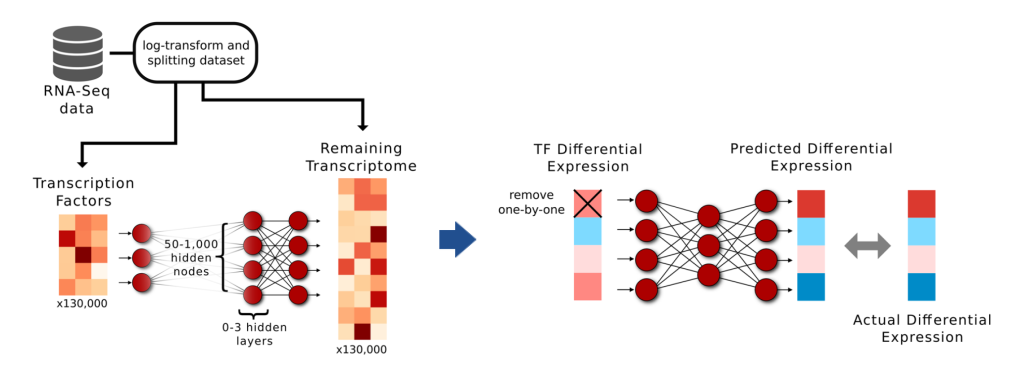

Similarly, if the perturbation signal is sent from within the NN layers (such as from their hidden nodes), we can identify which output features are related to the inner components of the model.

This reasoning was applied by Dwivedi et al. (2020) to explore the latent space of a deep transcriptomic autoencoder and establish relationships between the hidden layers and certain biological properties, such as centrality in the human PPI network or relationships to cell types and diseases.

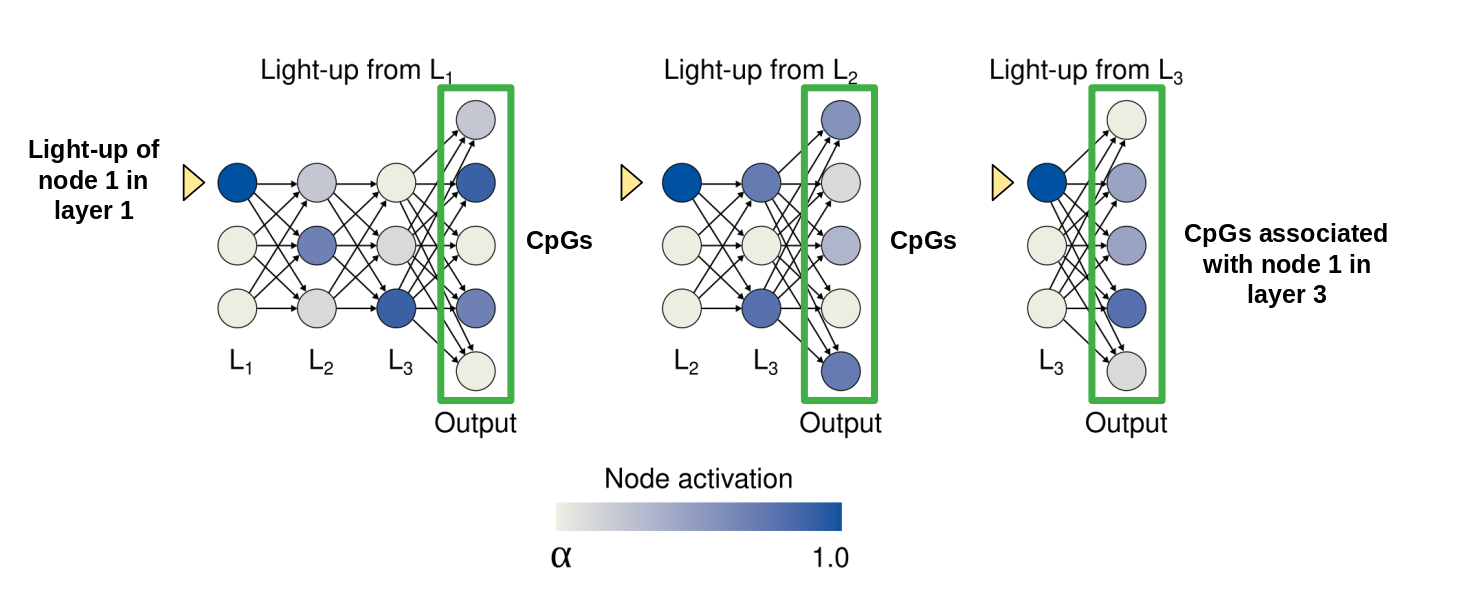

Another way in which the propagation of perturbations in NNs can be applied is the one showcased in Martínez-Enguita et al. (bioRxiv, 2023). 

Here, the relevance of the inputs for a specific task (such as age estimation, smoking status classification, or case-control disease prediction) is determined by iteratively perturbing the input of a pre-trained DNAm autoencoder concatenated with a pre-trained supervised NN and measuring changes on the models' final output.

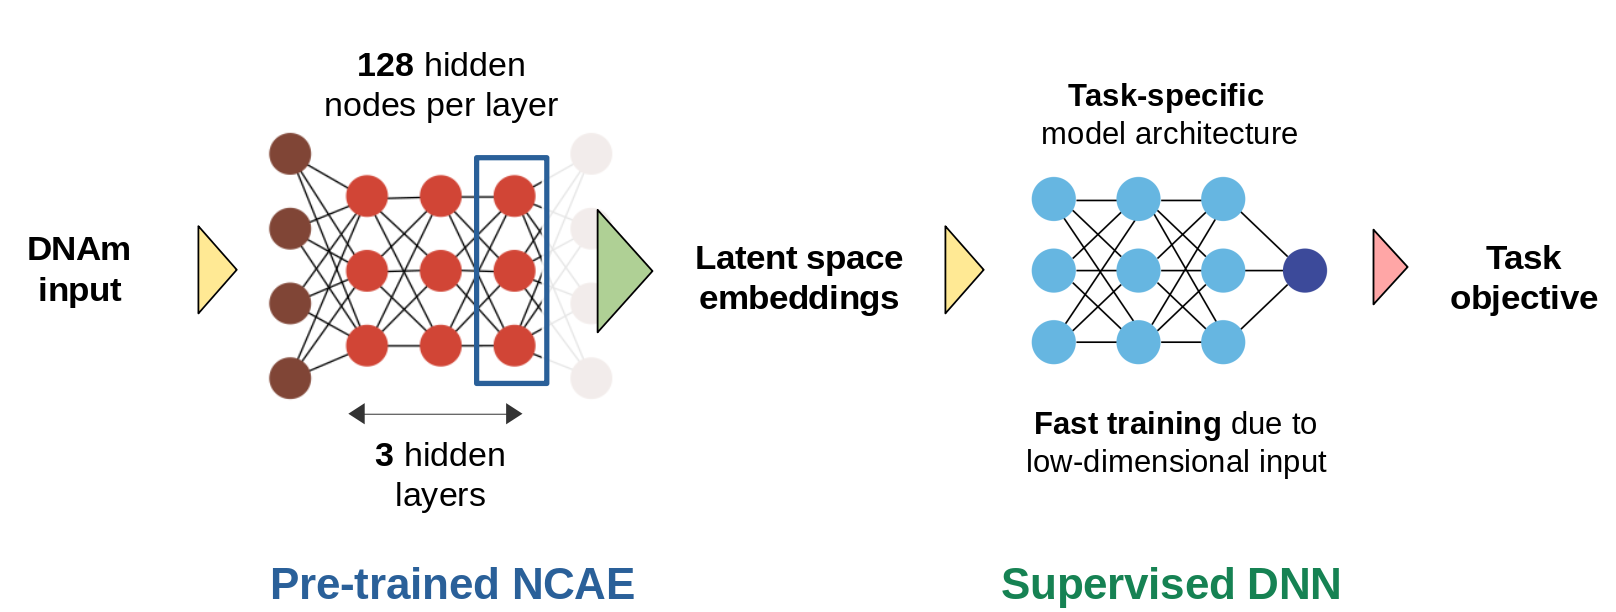

In [100]:
# Load model
supdnn = load_model("my_supdnn_4layers.h5", compile=False)

# Evaluate the accuracy of the supervised neural network
from sklearn.metrics import roc_curve, auc

# Predict test set
supypred_test = supdnn.predict(supX_test)

# Accuracy
test_acc = supdnn.evaluate(supX_test, supy_test, verbose=0)[1]
print("Accuracy [Test: %.3f]" % (test_acc))

# AUC
fpr, tpr, thresholds = roc_curve(np.array(supy_test.iloc[:,0]),
                                 np.array(supypred_test, dtype="float64").flatten(),
                                 pos_label=1)
test_auc = auc(fpr, tpr)

print("AUC [Test: %.3f]" % (test_auc))

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/stepWARNING:tensorflow:6 out of the last 26 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7f16e415f100> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Accuracy [Test: 0.513]
AUC [Test: 0.520]
